Setting up the data path ...
Loading the tweetID and messages ...


100%|██████████| 926/926 [00:00<00:00, 948919.01it/s]

Total tweets: 423
Loading the retweerUser, tweetUser, and tweetId ...
Total retweets: 926
Loading the lexicon file ...
Total jargons in lexicon: 189
Extracting tweetUser and tweetId ...
Total users who tweeted: 361
Extracting retweetUser and tweetId ...
Total users who retweeted: 329
Getting both tweet and retweet users ...
Total users who both tweeted and retweeted: 0
Getting all users either tweeter or retweeter ...
Total user who tweeted or retweeted: 690
Ploting the data ...



100%|██████████| 926/926 [00:00<00:00, 596425.91it/s]

done.
Estimating users lexicon representation ...
done.
Normalizing user's lexicon based represention ...
done.
Loading explicit links ...
Total explicit links: 926
Total nodes with degree at most 1 is 403
Removing nodes ....
done.



100%|██████████| 219/219 [00:00<00:00, 729589.02it/s]

Transforming the candidate users and its representation as data frame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Columns: 189 entries, 0 to 188
dtypes: float64(189)
memory usage: 1019.0 KB
None
Computing dot product divide by the length...
189
690,690
0.0,0.047619047619047616
Assessing the candidate users with edge weight 0.0047619047619047615 for step 1
Generating implicit links ...
Total implicit links: 219 and maximum weight: 0.027
Implicit links to data frame ...
writing to file ...
done
Creating graph ...



100%|██████████| 14/14 [00:00<00:00, 31570.03it/s]

Assessing the candidate users with edge weight 0.009523809523809523 for step 2
Generating implicit links ...
Total implicit links: 14 and maximum weight: 0.027
Implicit links to data frame ...
writing to file ...
done
Creating graph ...



100%|██████████| 12/12 [00:00<00:00, 154866.61it/s]

Assessing the candidate users with edge weight 0.014285714285714284 for step 3
Generating implicit links ...
Total implicit links: 12 and maximum weight: 0.027
Implicit links to data frame ...
writing to file ...
done
Creating graph ...



100%|██████████| 11/11 [00:00<00:00, 214592.30it/s]

Assessing the candidate users with edge weight 0.019047619047619046 for step 4
Generating implicit links ...
Total implicit links: 11 and maximum weight: 0.027
Implicit links to data frame ...
writing to file ...
done
Creating graph ...



100%|██████████| 10/10 [00:00<00:00, 182361.04it/s]

Assessing the candidate users with edge weight 0.023809523809523808 for step 5
Generating implicit links ...
Total implicit links: 10 and maximum weight: 0.027
Implicit links to data frame ...
writing to file ...
done
Creating graph ...



100%|██████████| 690/690 [00:00<00:00, 31290.96it/s]
0it [00:00, ?it/s]
100%|██████████| 690/690 [00:00<00:00, 30204.77it/s]
0it [00:00, ?it/s]
100%|██████████| 690/690 [00:00<00:00, 30115.19it/s]
0it [00:00, ?it/s]

Assessing the candidate users with edge weight 0.028571428571428567 for step 6
Generating implicit links ...
Total implicit links: 0 and maximum weight: 0
Implicit links to data frame ...
writing to file ...
done
Creating graph ...
Assessing the candidate users with edge weight 0.03333333333333333 for step 7
Generating implicit links ...
Total implicit links: 0 and maximum weight: 0
Implicit links to data frame ...
writing to file ...
done
Creating graph ...
Assessing the candidate users with edge weight 0.03809523809523809 for step 8
Generating implicit links ...
Total implicit links: 0 and maximum weight: 0
Implicit links to data frame ...
writing to file ...



100%|██████████| 690/690 [00:00<00:00, 29280.35it/s]
0it [00:00, ?it/s]
100%|██████████| 690/690 [00:00<00:00, 30705.66it/s]
0it [00:00, ?it/s]

done
Creating graph ...
Assessing the candidate users with edge weight 0.04285714285714285 for step 9
Generating implicit links ...
Total implicit links: 0 and maximum weight: 0
Implicit links to data frame ...
writing to file ...
done
Creating graph ...
Assessing the candidate users with edge weight 0.047619047619047616 for step 10
Generating implicit links ...
Total implicit links: 0 and maximum weight: 0
Implicit links to data frame ...
writing to file ...


done
Creating graph ...
done.


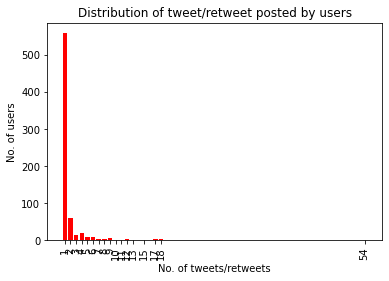

In [1]:
import os
import sys
import random

import json
import re

import collections
import pandas as pd
import numpy as np
import networkx as nx
#import ipycytoscape
#import torch
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.preprocessing import normalize
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import cosine_similarity
from node2vec import Node2Vec
from gensim.models import KeyedVectors
#from transformers import pipeline

from pyvis.network import Network


###plotting graphs, figures, etc
def draw_graph_pyvis(nx_graph, name, title):
        """
        """
        nt = Network("1000px", "1000px", heading = title, notebook=False)
        nt.from_nx(nx_graph)
        #nt.show_buttons(filter_=['physics'])
        nt.save_graph(str(name) + "_nx.html")


def plots_graph_cytoscrap(G):
        """
        """
        model = ipycytoscape.CytoscapeWidget()
        model.graph.add_graph_from_networkx(G)
        display(model)


def plots_graph_hetero_edges(nodes, edge_list_A, colorA, edge_list, colorB, title, fig_name):
        # plot graph
        plt.figure(figsize=(10,10))
        plt.title(title)

        G = nx.cubical_graph()
        #pos = nx.spring_layout(G)
        pos = nx.random_layout(G)

        nx.draw_networkx_nodes(G, pos, nodelist=nodes, **options)

        nx.draw_networkx_edges(
            G,
            pos,
            edgelist=edge_list_A,
            width=8,
            alpha=0.5,
            edge_color=colorA,
        )

        nx.draw_networkx_edges(
            G,
            pos,
            edgelist=edge_list_B,
            width=.8,
            alpha=0.5,
            edge_color=colorB,
        )
        #plt.show()
        plt.savefig(fig_name, format="PNG")
        #plt.close()

def plots_graph(G, title, color, fig_name):
        # plot graph
        plt.figure(figsize=(10,10))
        plt.title(title)

        #pos = nx.spring_layout(G)
        pos = nx.random_layout(G)

        if color is None:
            nx.draw_networkx(G, with_labels=True,  pos = pos, node_size = 1, alpha = 0.6, width = 0.7)
        else:
            nx.draw_networkx(G, with_labels=True,  pos = pos, node_size = 1, 
                             alpha = 0.6, width = 0.7, edge_color=color)
            labels = nx.get_edge_attributes(G,'edge_weight')
            nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

        #plt.show()
        plt.savefig(fig_name, format="PNG")
        #plt.close()

    
def save_plot_dict_to_histo(data, title, labelX, labelY, labels, fig_name):
        degreeCount = collections.Counter(data.values())
        deg, cnt = zip(*degreeCount.items())

        _, ax = plt.subplots()

        plt.bar(deg, cnt, width=0.80, color="r")
        plt.title(title)
        plt.xlabel(labelX)
        plt.ylabel(labelY)

        ax.set_xticks([d for d in deg])
        ax.set_xticklabels(deg, rotation=90, ha='center')
        if labels is not None:
            ax.legend(labels)
        #plt.show(block=False)
        plt.savefig(fig_name, format="PNG")
        #plt.close()


## reading and writing data    
def get_file_content(path):
        with open(path, 'r') as f:
            lines = f.read().splitlines()
        return lines

def get_json_content(path):
        with open(path, 'r') as f:
            json_data = json.load(f)

        data = json.loads(json_data)
        return data


### transform data from one container to others (dict to dataframe)
def links_to_df(links, edge_type):
        node_list_1 = []
        node_list_2 = []
        edge_weight = []
        #edge_color = []
        #weight = []

        for i in tqdm(links):
            node_list_1.append(i.split(',')[0])
            node_list_2.append(i.split(',')[1])
            edge_weight.append(i.split(',')[2])
            #edge_color.append(edge_type)

        links_df = pd.DataFrame({'source': node_list_1, 'target': node_list_2, 'edge_weight': edge_weight})
        return links_df


##sorting algorithms
def get_sorted_dict_by_values(data, isReverse=False):    
        return sorted(data.items(), key=lambda x: x[1], reverse=isReverse)


def get_common_dict_keys(dictA, dictB):    
        """
            returns the keys that are common in two dictionaries
        """
        common_keys = [ key for key in dictA if key in dictB]
        return common_keys    

    
def get_combined_dict_keys(dictA, dictB):    
        """
            returns the all the keys from two dictionaries
        """
        keysA = list(dictA.keys())
        keysB = list(dictB.keys())
        combined_keys = list(set(keysA).union(keysB))
        return combined_keys

    
def merge_two_dicts(dictA, dictB):
        """
            returns the merged dictionary from the given dictionaries
        """
        dictC = {}
        for key in dictA:
            valList = dictA.get(key)
            if key in dictB:
                valBList = dictB.get(key)
                valList = valList + valBList
            dictC[key] = valList
        
        for key in dictB:
            valList = dictB.get(key)
            dictC[key] = valList        
        return dictC

##processing parts
def update_keyValsDict(keyValsDict, key, val):
        """
            update the dictionary keyValsDict[key -> val1, val2] with the 
            given and (key, val) pair
        """
        valueList = keyValsDict.get(key)
        if valueList is None:
            valueList = []
        if val not in valueList:
            valueList.append(val)
        keyValsDict[key] = valueList
            
        
def get_tweetUserID_tweetIDs(retweetUID_tweetUID_tweetID):
        """
            return the users with the tweet IDs
            {userID-> [tweetID, tweetID, ...]}
        """
        userID_tweetIDs = {}
        for r_o_t in tqdm(retweetUID_tweetUID_tweetID):
            parts = r_o_t.split(',')
            r, o, t = parts[0], parts[1], parts[2]   
        
            update_keyValsDict(userID_tweetIDs, o, t)
        return userID_tweetIDs

def get_retweetUserID_tweetIDs(retweetUID_tweetUID_tweetID):
        """
            return the users with the retweet IDs
            {userID-> [retweetID, retweetID, ...]}
        """
        userID_retweetIDs = {}
        for r_o_t in tqdm(retweetUID_tweetUID_tweetID):
            parts = r_o_t.split(',')
            r, o, t = parts[0], parts[1], parts[2]   
        
            update_keyValsDict(userID_retweetIDs, r, t)
        return userID_retweetIDs
    
        
def get_userID_tweetIDs(retweetUID_tweetUID_tweetID):
        """
            return the users with the tweet/retweet IDs
            {userID-> [TweetID, retweetID, ...]}
        """
        userID_tweetIDs = {}
        for r_o_t in tqdm(retweetUID_tweetUID_tweetID):
            parts = r_o_t.split(',')
            r, o, t = parts[0], parts[1], parts[2]   
        
            update_keyValsDict(userID_tweetIDs, r, t)
            update_keyValsDict(userID_tweetIDs, o, t)
        return userID_tweetIDs


def get_userID_tweetFreq(userID_tweetID):
        userID_tweetFreq = {}
        max_freq = 0
        for userID in userID_tweetID:
            tweetIDs = userID_tweetID.get(userID)
            freq = len(tweetIDs)
            max_freq = max(max_freq, freq)
            userID_tweetFreq[userID] = freq
        return userID_tweetFreq, max_freq


def get_message(tweetID, tweetID_msg):
        messages = []
        for tweetID in tweetID:
            content = tweetID_msg[tweetID]
            messages.append(content)
        return ' '.join(messages)


def messages_to_tokens(messages):
        tokens = messages.lower().split()
        return tokens


def lexicon_based_features(lexicons, messages):
        features = [0] * len(lexicons)
        tokens = messages_to_tokens(messages)
        tokens_freq = collections.Counter(tokens)

        for ldx in range(0, len(lexicons)):
            lexicon = lexicons[ldx]
            if lexicon in tokens:
                freq = tokens_freq.get(lexicon)
                features[ldx] = freq
        return features


def get_userID_lex_repr(userID_tweetIDs, tweetID_msg, lexicons):    
        representations = []
        lexicons_lower = [lexicon.lower() for lexicon in lexicons]
        user_IDs = []
        for userID in userID_tweetIDs:
            tweetID = userID_tweetIDs.get(userID)
            messages = get_message(tweetID, tweetID_msg)
            features = lexicon_based_features(lexicons_lower, messages)    
            representations.append(features)
            user_IDs.append(userID)
        return user_IDs, representations

def get_normalized_representation(lex_repr):
        """
            returns the normalized lexicon representaiton
        """
        normalized_representations = normalize(lex_repr, axis=0, norm='max')        
        #print ("After normalization: {}".format(len(normalized_representations)))
        #print ("After normalization: {}".format(len(normalized_representations[0])))
        return normalized_representations
    
    
def get_userID_lex_score(userID_lexicon_representation):
        """
        """
        userIDs = userID_lexicon_representation.keys()
        userID_lexicon_score = {}
        
        max_score = 0
        for userID in userIDs:
            representation = userID_lexicon_representation[userID]
            score = np.sum(np.array(representation)>0)
            max_score = max(max_score, score)
            userID_lexicon_score[userID] = score    
        return userID_lexicon_score, max_score


def get_candidate_userID(userID_lex_score_sorted, threshold):
        """
            returns the candidate userID based on the threshold
        """
        candidate_userID = [item[0] for item in userID_lex_score_sorted if item[1]>=threshold]
        return candidate_userID

    
def get_candidate_userID_lex_repr(candidate_userID, userID_lex_repr):
        """
            returns the cadidate userID with its representation
        """
        candidate_userID_lex_repr = {}
        for userID in candidate_userID:
            candidate_userID_lex_repr[userID] = userID_lex_repr[userID]
        return candidate_userID_lex_repr
    
def dot_length_similarity(data_matrix, lexicon):
        """
            returns the normalized data using the function as 
            N = dot(A, B)/len(A)
        """    
        length = len(lexicon)
        print (length)
        D = np.array(data_matrix)
        Dt = D.T
        S = np.dot(D, Dt)
        NS = S/length
        return NS
    

def get_min_max_sim(users_sim):
        """
            return the minimum and maximum similarity score
        """
        min_score = 1
        max_score = 0
        for item in tqdm(range(0, len(users_sim))):
            sim_vec = users_sim[item]
            ms = np.min(sim_vec)
            MS = np.max(sim_vec)
            min_score = min(min_score, ms)
            max_score = max(max_score, MS)
        return min_score, max_score
    
    
def get_implicit_links(candidate_userID, user_to_user_sim, link_threshold):
        im_links = []
        max_weight = 0
        for udx in tqdm(range(0, len(candidate_userID))):
            node1 = candidate_userID[udx]
            neighbors = user_to_user_sim[udx]

            #devide by the lexicon size

            neighbors_decision = np.array(neighbors[(udx+1):])>=link_threshold
            neighbors_candidates = np.array(candidate_userID[(udx+1):])[neighbors_decision]
            neighbors_weight = np.array(neighbors[(udx+1):])[neighbors_decision]

            for ndx in range(0, len(neighbors_candidates)):
                neighbor = neighbors_candidates[ndx]
                weight = round(neighbors_weight[ndx], 3)
                max_weight = max(max_weight, weight)
                im_links.append(str(node1)+','+str(neighbor)+','+str(weight))           
            #vdx = udx + 1
            #while vdx<len(candidate_userID):
            #    node2 = candidate_userID[vdx]
            #    weight = neighbors[vdx]
            #    max_weight = max(max_weight, weight)
            #    if weight>=link_threshold:
            #         im_links.append(str(node1)+','+str(node2)+','+str(weight))
            #    vdx = vdx + 1
        return im_links, max_weight


def get_explicit_links(retweetUID_tweetUID_tweetID):
        ex_links = []
        for r_o_t in tqdm(retweetUID_tweetUID_tweetID):
            parts = r_o_t.split(',')
            node1 = parts[0]
            node2 = parts[1]
            t = parts[2]   
            weight = 1
            ex_links.append(str(node1)+','+str(node2)+','+str(weight))
        return ex_links


def get_node_degree(G):
        """
            returns the nodes with its degree from the graph
        """
        node_sequence = [n for n, d in G.degree()]
        degree_sequence = [d for n, d in G.degree()]
        max_degree = 0
        if len(degree_sequence)>0:
            max_degree = max(degree_sequence)
        node_degree = dict(zip(node_sequence, degree_sequence))
        return node_degree, max_degree

def get_nodes_with_degree(G, degree):
        return [node for node,degree in dict(G.degree()).items() if degree < 2]


print ("Setting up the data path ...")
data_dir = "/projets/sig/mullah/nlp/prevision_fgpi"
figures_path = "../figures/"
graph_dir = data_dir + "/graph"
lexicon_name = "Radical"
model = "BoWs"




#newretweetuserid_neworiginaluserid_path = os.path.join(data_dir, 'data/processed/20000_UserRetweetID_UserOriginalID_NewID.txt')
tweetID_msg_path = os.path.join(data_dir, 'data/processed/id_OriginalTweet.json')
retweetUserID_tweetUserID_tweetID_path = os.path.join(data_dir, 'data/processed/UserRetweet_UserOriginal_idOriginalTweet.txt')
lexicon_path = os.path.join(data_dir, 'lexicons/'+lexicon_name)

print ("Loading the tweetID and messages ...")
tweetID_msg = get_json_content(tweetID_msg_path)
print ("Total tweets: {}".format(len(tweetID_msg)))

print ("Loading the retweerUser, tweetUser, and tweetId ...")
retweetUserID_tweetUserID_tweetID = get_file_content(retweetUserID_tweetUserID_tweetID_path)
print ("Total retweets: {}".format(len(retweetUserID_tweetUserID_tweetID)))

print ("Loading the lexicon file ...")
lexicon = get_file_content(lexicon_path)
print ("Total jargons in lexicon: {}".format(len(lexicon)))

print ("Extracting tweetUser and tweetId ...")
tweetUserID_tweetId = get_tweetUserID_tweetIDs(retweetUserID_tweetUserID_tweetID)
print ("Total users who tweeted: {}".format(len(tweetUserID_tweetId)))

print ("Extracting retweetUser and tweetId ...")
retweetUserID_tweetId = get_retweetUserID_tweetIDs(retweetUserID_tweetUserID_tweetID)
print ("Total users who retweeted: {}".format(len(retweetUserID_tweetId)))

print ("Getting both tweet and retweet users ...")
bothTweetRetweetUserID = get_common_dict_keys(tweetUserID_tweetId, retweetUserID_tweetId)
print ("Total users who both tweeted and retweeted: {}".format(len(bothTweetRetweetUserID)))

print ("Getting all users either tweeter or retweeter ...")
userID_tweetIDs = merge_two_dicts(tweetUserID_tweetId, retweetUserID_tweetId)
print ("Total user who tweeted or retweeted: {}".format(len(userID_tweetIDs)))

print ("Ploting the data ...")
userID_freq, max_freq = get_userID_tweetFreq(userID_tweetIDs)
#save_plot_dict_to_histo(userID_freq, "Distribution of tweet/retweet poster by users", "No. of tweets/retweets", "No. of users", 
#                        ['Max no. of tweets/retweets: '+str(max_freq)], figures_path + "Users_Tweets_Distribution.png")
save_plot_dict_to_histo(userID_freq, "Distribution of tweet/retweet posted by users", "No. of tweets/retweets", "No. of users", 
                        None, figures_path + model + '_' +"Users_Tweets_Distribution.png")
print ("done.")

print ("Estimating users lexicon representation ...")
userIDs, lexicon_repr = get_userID_lex_repr(userID_tweetIDs, tweetID_msg, lexicon)
print ("done.")

print ("Normalizing user's lexicon based represention ...")
lexicon_repr_normalized = get_normalized_representation(lexicon_repr)
print ("done.")

#print ("Users used jargon from the lexicon...")
#userID_lex_score, max_jargon_used = get_userID_lex_score(userID_lex_repr_normalized)
#save_plot_dict_to_histo(userID_lex_score, "Distribution of jargon in tweets/retweets of users", "Numbers of jargon used", 
#                        "No. of users", ['Max jargon used: '+str(max_jargon_used)], figures_path + "Users_Radical_Scores_Distribution.png")

#print ("Maximum jargon used: {}".format(max_jargon_used))

#print ("Setting up the parameters ...")
#link_weight_threshold = 1

print ('Loading explicit links ...')
ex_links = get_explicit_links(retweetUserID_tweetUserID_tweetID)
print ("Total explicit links: {}".format(len(ex_links)))

edge_color = 'b'
ex_links_df = links_to_df(ex_links, edge_color)
G_explicit_link = nx.from_pandas_edgelist(ex_links_df, "source", "target", create_using=nx.Graph())
#print ('Drawing the graph of explicit links only ...')

degree = 1
nodes_degree = get_nodes_with_degree(G_explicit_link, degree)
print ("Total nodes with degree at most {} is {}".format(degree, len(nodes_degree)))

print ("Removing nodes ....")
G_explicit_link.remove_nodes_from(nodes_degree)
print ("done.")

#edge_color = 'b'
#plots_graph(G_explicit_link, "Graph of users with explicit links", edge_color,
#            figures_path + "Graph_of_users_with_explicit_links.png")
#plots_graph(G_explicit_link, "Graph of users with explicit links", edge_color,
#            figures_path + "Graph_of_users_with_explicit_links.png")
draw_graph_pyvis(G_explicit_link, figures_path + "Graph_of_users_with_explicit_links", "Graph_of_users_with_explicit_links")
nx.write_gpickle(G_explicit_link, graph_dir + "/Graph_of_users_with_explicit_links")

#explit_edges = nx.to_edgelist(G_explicit_link)
#nodes = nx.nodes

print ("Transforming the candidate users and its representation as data frame")
lexicon_repr_normalized_DF = pd.DataFrame(lexicon_repr_normalized)
print (lexicon_repr_normalized_DF.info())
    
print ("Computing dot product divide by the length...")
users_Sim = dot_length_similarity(lexicon_repr_normalized_DF, lexicon)
print ("{},{}".format(len(users_Sim),len(users_Sim[0])))
min_sim, max_sim = get_min_max_sim(users_Sim)
print ("{},{}".format(min_sim, max_sim))

#print ("Computing user similarity ...")
#user_to_user_sim = squareform(pdist(candidate_userID_representation_DF.T, metric='cosine'))
#users_Sim = cosine_similarity(lexicon_repr_normalized_DF)
#print ("{},{}".format(len(users_Sim),len(users_Sim[0])))
#print (users_Sim)

#for num_jargon in range(1, max_jargon_used):
dif = max_sim - min_sim
inc = dif/10

for step in range(1, 11):
#for step in range(5, 6):
    #edge_weight = step/10
    edge_weight = min_sim + step * inc
    print ("Assessing the candidate users with edge weight {} for step {}".format(edge_weight, step))

    #userID_lex_score_sorted = get_sorted_dict_by_values(userID_lex_score, True)
    #candidate_userID = get_candidate_userID(userID_lex_score_sorted, edge_weight)
    #print ("Total candidate users: {}".format(len(candidate_userID)))

    #print ("Representaiton of candidate users ....")
    #candidate_userID_lex_repr = get_candidate_userID_lex_repr(candidate_userID, userID_lex_repr_normalized)
       
    print ("Generating implicit links ...")
    im_links, max_weight = get_implicit_links(userIDs, users_Sim, edge_weight) 
    print ("Total implicit links: {} and maximum weight: {}".format(len(im_links), max_weight))

    print ("Implicit links to data frame ...")
    edge_color = "r"
    im_links_df = links_to_df(im_links, edge_color)
    
    print ('writing to file ...')
    im_graph_path = graph_dir + '/implicit_' + lexicon_name + '_' + str(step)
    im_links_df.to_csv(im_graph_path)
    print ('done')

    print ("Creating graph ...")
    G_implicit_link = nx.from_pandas_edgelist(im_links_df, edge_attr="edge_weight", 
                                              create_using=nx.Graph())
    node_degree, max_degree = get_node_degree(G_implicit_link)
    if len(node_degree) < 2:
        continue
    draw_graph_pyvis(G_implicit_link, figures_path + "Graph_of_users_with_implicit_links_" + str(step), "Graph_of_users_with_implicit_links_" + str(step))
    
    """
    print ('Degree distribution of users in the graph of implicit links ...')
    save_plot_dict_to_histo(node_degree, "Degree distribution of users with implicit links", "Degree", 
                            "No. of users", ['Max degree: '+str(max_degree)], figures_path + 'Graph_implicit_degree_'+str(edge_weight)+'.png')

    print ('Drawing the graph of implicit links only ...')
    plots_graph(G_implicit_link, "Graph of users with implicit links for edge weight "+str(edge_weight), 
                edge_color, figures_path + "Graph_of_users_with_implicit_links_for_"+str(edge_weight)+".png")

    
    implicit_edges = nx.to_edgelist(G_implicit_link)
    #Gexp_imp = F = nx.compose(G_explicit_link, G_implicit_link)
    #print ('Drawing the graph of implicit links only ...')
    #plots_graph(G_implicit_link, "Graph of users with implicit links for "+str(num_jargon)+"", 
    #            edge_color, figures_path + "Graph_of_users_with_implicit_links_for_"+str(num_jargon)+".png")
    
    #print ("Drawing the superimposed explicit and implicit graphs ... ")
    #plots_graph_hetero_edges(nodes, explit_edges, 'b',  implicit_edges, 'r', 
    #                         "Graph of users with explicit and implicit links for "+str(num_jargon)+"jargon", 
    #                        figures_path + "Graph_of_users_with_explicit_and_implicit_links_for_"+str(num_jargon)+"_lexicons.png")
    """
    #integrating two graphs
    extended_graph = nx.Graph()
    extended_graph.add_edges_from(G_explicit_link.edges, color="blue")
    extended_graph.add_edges_from(G_implicit_link.edges, color="red")
    draw_graph_pyvis(extended_graph, figures_path + "Graph_of_users_with_explicit_and_implicit_links_" + str(step), "Graph_of_users_with_explicit_and_implicit_links_" + str(step))
    nx.write_gpickle(extended_graph, graph_dir + "/Graph_of_users_with_explicit_and_implicit_links_" + str(step))
    
print ('done.')
